<a href="https://colab.research.google.com/github/ralbu85/AI_student/blob/master/Autoencoder_%EC%88%98%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#패키지 불러오기

In [ ]:
# 기본 패키지
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# 이상치 탐지 시 사용될 패키지
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [ ]:
# 케라스 관련 패키지
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model # 사용자 정의 모형을 만들기 위한 템플릿

#데이터 불러오기

In [ ]:
# 생성모델 : 비지도학습
(x_train,_),(x_test,_) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# 이미지 데이터 스케일링
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


#Model을 상속받아 custom 모델 만들기

In [ ]:
class Autoencoder(Model): # Model -> 사용자 정의 모형을 만들기 위한 일종의 템플릿
    # Autoencoder(32)
    def __init__(self, latent_dim): # self 자기 자신(관례적), latent_dim 입력 매개변수
        super(Autoencoder, self).__init__() # Model 클래스 내부의 생성자
        self.latent_dim = latent_dim # latent_dim이라고 하는 내부 변수 <- 사용자가 객체 만들 때 입력한 값을 저장
        self.encoder = tf.keras.Sequential([
                                            layers.Flatten(),
                                            layers.Dense(latent_dim, activation='sigmoid')
        ])
        self.decoder = tf.keras.Sequential([
                                            layers.Dense(784, activation='relu'),
                                            layers.Reshape((28,28))
        ])
        
    # 오버라이딩
    # Model을 상속받음
    # Model 안에 call이라는 함수가 템플릿처럼 존재
    # call -> 입력변수가 들어와서 y 값이 어떻게 출력되는지 정의
    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
autoencoder = Autoencoder(64) # 잠재차원이 64개인 오토인코더 생성

In [ ]:
autoencoder.compile(optimizer='adam', loss = losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train,x_train,
                epochs=10,shuffle=True,
                validation_data=(x_test,x_test)
                )

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0529 - val_loss: 0.0392
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0359 - val_loss: 0.0343
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0325 - val_loss: 0.0319
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0316 - val_loss: 0.0315
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0314 - val_loss: 0.0314
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0313 - val_loss: 0.0313
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0312 - val_loss: 0.0309
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0308 - val_loss: 0.0308
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0307 - val_loss: 0.0308
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.030

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

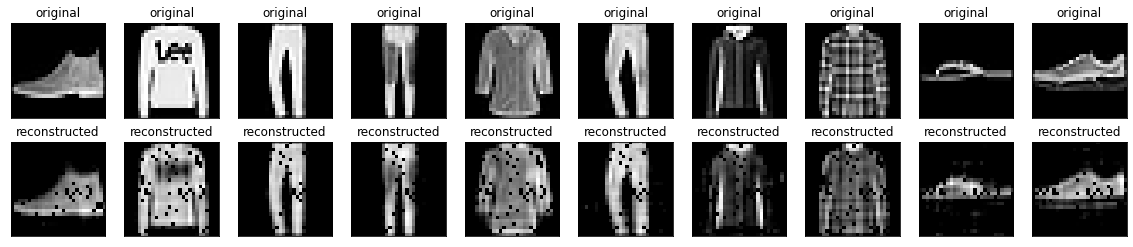

In [ ]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1) # 20개의 그림을 만들겠다, (2,10,1)~(2,10,10)
  plt.imshow(x_test[i]) # 원본데이터
  plt.title('original')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2,n,i+1+n) # (2,10,11)~(2,10,20)
  plt.imshow(decoded_imgs[i])
  plt.title('reconstructed')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

# 이미지 denoising(잡음제거)

In [ ]:
(x_train,_), (x_test,_) = fashion_mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
noise_factor = 0.2
# 각각의 데이터 값에다가 정규분포에서 나오는 값을 무작위로 생성하여 noise_factor 만큼 noise를 줌
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

# clip_by_value를 통해 최솟값과 최댓값을 주어 0~1을 넘어가는 값들은 절삭시켜줌
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

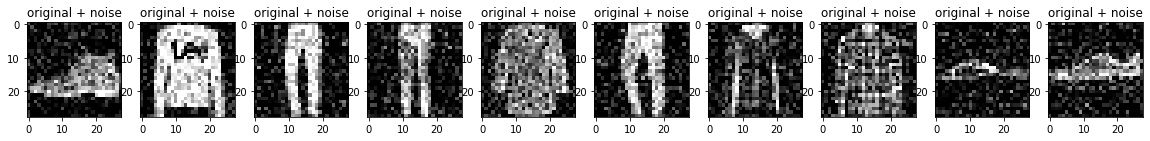

In [ ]:
n = 10
plt.figure(figsize=(20,2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.title("original + noise")
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.gray()
plt.show()

In [ ]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

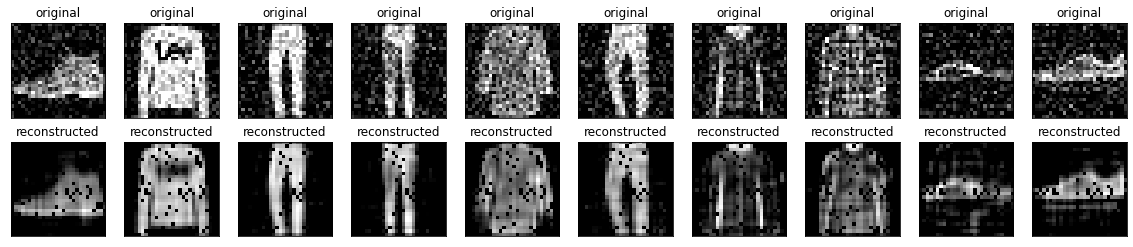

In [ ]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1) # 20개의 그림을 만들겠다, (2,10,1)~(2,10,10)
  plt.imshow(x_test_noisy[i]) # 원본데이터
  plt.title('original')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2,n,i+1+n) # (2,10,11)~(2,10,20)
  plt.imshow(decoded_imgs[i])
  plt.title('reconstructed')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

# 이상치 탐지 : 심전도 데이터셋

In [ ]:
df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header = None)
df 
# 4998명의 심전도 데이터 (140번 컬럼이 정상/비정상을 나타내는 label이긴 하나 여기선 140번 컬럼인 정답을 모른다고 가정)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,...,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,...,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,...,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,-0.674995,...,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,-0.983242,...,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.

In [ ]:
df.values

array([[-0.11252183, -2.8272038 , -3.7738969 , ...,  0.92528624,
         0.19313742,  1.        ],
       [-1.1008778 , -3.9968398 , -4.2858426 , ...,  1.1196209 ,
        -1.4362499 ,  1.        ],
       [-0.56708802, -2.5934502 , -3.8742297 , ...,  0.90422673,
        -0.42179659,  1.        ],
       ...,
       [-1.1229693 , -2.2529248 , -2.8676281 , ..., -2.0083694 ,
        -1.8083338 ,  0.        ],
       [-0.54770461, -1.8895451 , -2.8397786 , ...,  1.1504486 ,
         0.80493225,  0.        ],
       [-1.3517791 , -2.2090058 , -2.5202247 , ..., -1.577823  ,
        -0.68453092,  0.        ]])

In [ ]:
raw_data = df.values

# 데이터의 형태 파악

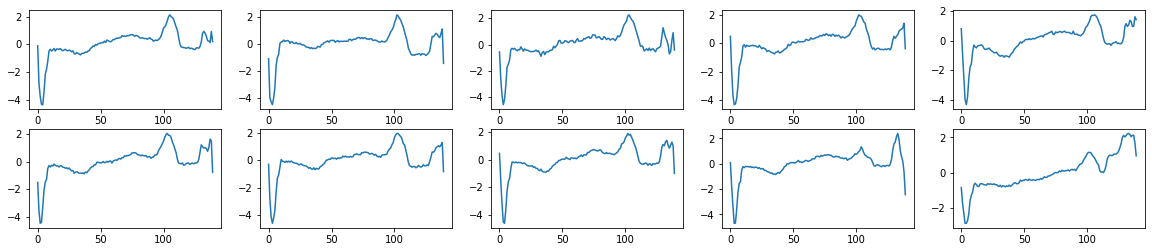

In [ ]:
plt.figure(figsize=(20,4))
for i in range(10):
  ax = plt.subplot(2,5,i+1)
  plt.plot(df.values[i][:-1]) #140번째 컬럼을 제외한 값을 보고싶기 때문

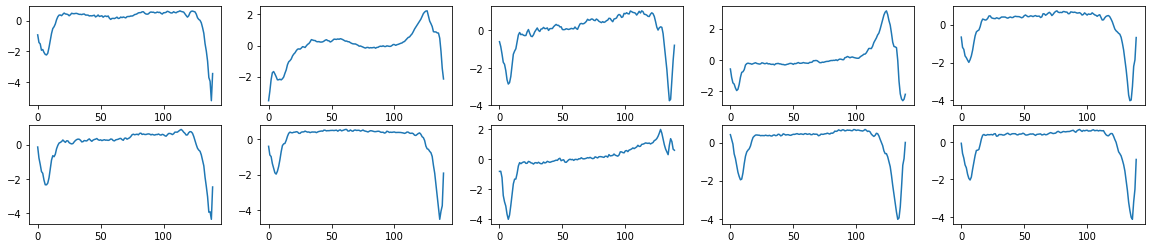

In [ ]:
plt.figure(figsize=(20,4))
for i in range(10):
  ax = plt.subplot(2,5,i+1)
  plt.plot(df.values[i+4950][:-1]) #140번째 컬럼을 제외한 값을 보고싶기 때문

# 레이블과 데이터 분리

In [ ]:
labels = raw_data[:,-1] # 이상치 정답
labels

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
data = raw_data[:,0:-1] # 마지막 열을 제외한 원래 데이터

In [ ]:
data

array([[-0.11252183, -2.8272038 , -3.7738969 , ...,  0.12343082,
         0.92528624,  0.19313742],
       [-1.1008778 , -3.9968398 , -4.2858426 , ...,  0.77381971,
         1.1196209 , -1.4362499 ],
       [-0.56708802, -2.5934502 , -3.8742297 , ...,  0.32109663,
         0.90422673, -0.42179659],
       ...,
       [-1.1229693 , -2.2529248 , -2.8676281 , ..., -2.874136  ,
        -2.0083694 , -1.8083338 ],
       [-0.54770461, -1.8895451 , -2.8397786 , ...,  1.261335  ,
         1.1504486 ,  0.80493225],
       [-1.3517791 , -2.2090058 , -2.5202247 , ..., -2.2600228 ,
        -1.577823  , -0.68453092]])

In [ ]:
train_data,test_data,train_labels,test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 21)

In [ ]:
# MinMax스케일링
# min_val = tf.reduce_min(train_data)
# max_val = tf.reduce_max(train_data)

# train_data = (train_data - min_val) / (max_val - min_val)
# test_data = (test_data - min_val) / (max_val - min_val)

# train_data = tf.cast(train_data, tf.float32)
# test_data = tf.cast(test_data, tf.float32)

In [ ]:
# MinMax 스케일링
min_val = train_data.min()
max_val = train_data.max()

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

In [ ]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

In [ ]:
test_labels # True(1)가 정상, False(0)이 비정상 데이터

array([ True, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True, False, False, False,
        True, False,  True,  True, False,  True, False,  True,  True,
       False, False,  True, False, False,  True,  True, False,  True,
       False, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True,  True, False, False, False,  True,
        True, False, False, False,  True, False,  True, False, False,
        True, False,  True, False,  True,  True,  True, False,  True,
       False,  True,  True,  True, False,  True, False,  True,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
       False,  True,

In [ ]:
# 정상 데이터 추출
normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

# 비정상 데이터 추출
abnormal_train_data = train_data[~train_labels] # ~not
abnormal_test_data = test_data[~test_labels] # ~not

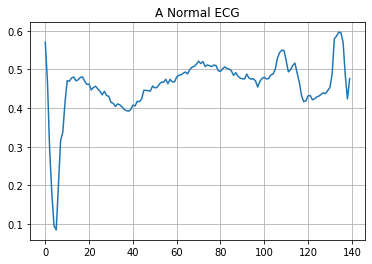

In [ ]:
# 정상데이터 그리기
plt.grid() # 그래프에 격자 표시
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

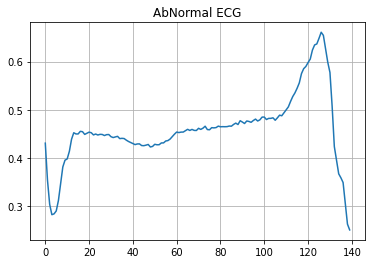

In [ ]:
# 비정상데이터 그리기
plt.grid() # 그래프에 격자 표시
plt.plot(np.arange(140), abnormal_train_data[0])
plt.title("AbNormal ECG")
plt.show()

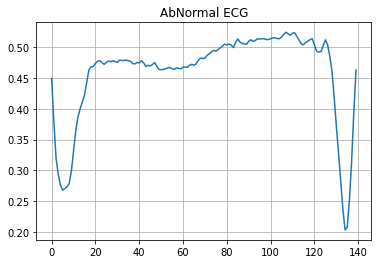

In [ ]:
# 비정상데이터 그리기
plt.grid() # 그래프에 격자 표시
plt.plot(np.arange(140), abnormal_train_data[1])
plt.title("AbNormal ECG")
plt.show()

# Autoencoder를 이상치 탐지에 활용

In [ ]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(8, activation='relu')
    ])

    self.decoder = tf.keras.Sequential([
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(140, activation='sigmoid')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
autoencoder = AnomalyDetector()
autoencoder.compile(optimizer='adam', loss='mae') # mean absolute error

In [ ]:
history = autoencoder.fit(normal_train_data, normal_train_data,
                          epochs = 20,
                          batch_size = 512,
                          validation_data = (test_data, test_data),
                          shuffle = True)

Epoch 1/20
5/5 [==============================] - 1s 46ms/step - loss: 0.0610 - val_loss: 0.0550
Epoch 2/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0569 - val_loss: 0.0527
Epoch 3/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0546 - val_loss: 0.0511
Epoch 4/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0522 - val_loss: 0.0496
Epoch 5/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0494 - val_loss: 0.0480
Epoch 6/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0464 - val_loss: 0.0468
Epoch 7/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0434 - val_loss: 0.0453
Epoch 8/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0405 - val_loss: 0.0434
Epoch 9/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0376 - val_loss: 0.0423
Epoch 10/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0349 - val_loss: 0.0413
Epoch 11/20
5/5 [============

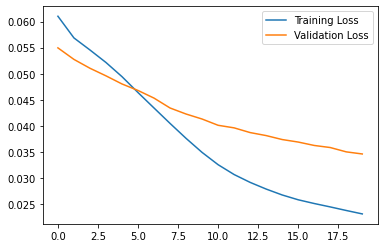

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

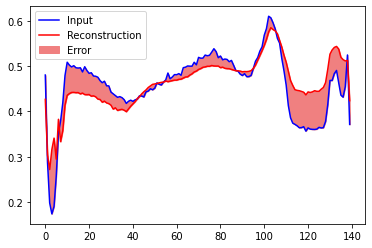

In [ ]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

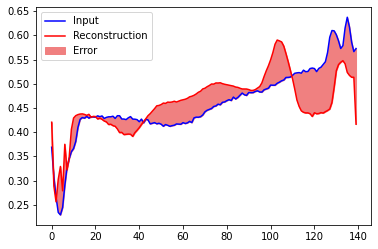

In [ ]:
encoded_data = autoencoder.encoder(abnormal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(abnormal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], abnormal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

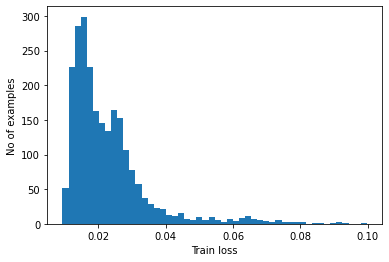

In [ ]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.03467437143820592


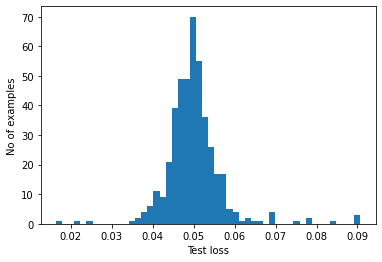

In [ ]:
reconstructions = autoencoder.predict(abnormal_test_data)
train_loss = tf.keras.losses.mae(reconstructions, abnormal_test_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [ ]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.942
Precision = 0.9921568627450981
Recall = 0.9035714285714286
